## Regression Modeling

The first part of this notebook follows closely the introductory examples in the Statsmodels online documentation. We won't try to provide the theoretical basis for regression models here.  You can consult any number of online resources for this, including Wikipedia's explanation of [Ordinary Least Squares Regression](https://en.wikipedia.org/wiki/Ordinary_least_squares). We will be using the Statsmodels library for this ([documentation here](http://statsmodels.sourceforge.net/stable/index.html)).

The statistical model is assumed to be $Y = X\beta + \epsilon$, where $\epsilon\sim N\left(0,\sigma^{2}\Sigma\right)$

Depending on the assumption on $\Sigma$, Statsmodels have currently four classes available

- GLS : generalized least squares for arbitrary covariance $\Sigma$
- OLS : ordinary least squares for i.i.d. errors $\Sigma=\textbf{I}$
- WLS : weighted least squares for heteroskedastic errors $\text{diag}\left  (\Sigma\right)$
- GLSAR : feasible generalized least squares with autocorrelated AR(p) errors $\Sigma=\Sigma\left(\rho\right)$

We focus here on the simple Ordinary Least Squares (OLS) model that is the most widely used, but makes strong assumptions about the errors being indepentently and identically distributed (i.i.d.).  When these conditions are met, the OLS parameter estimates are the Best Linear Unbiased Estimates (BLUE).

More intuitively (perhaps), what linear regression using the OLS estimator attempts to do is find the vector of parameters ($\beta$), such that when you compute a linear function $X\beta$ you generate a predicted array of $\hat{y}$ that, compared to the observed $y$, the squared sum of each observation's error ($\epsilon_{i} = \hat{y}_{i} - y_{i}$) across all the observations ($\Sigma^{2}\epsilon_{i}$), is minimized.

In [1]:
import statsmodels.api as sm
import pandas
from patsy import dmatrices

First we read a standard dataset that comes with Statsmodels.

In [2]:
df = sm.datasets.get_rdataset("Guerry", "HistData").data
df.head()

,dept,Region,Department,Crime_pers,Crime_prop,Literacy,Donations,Infants,Suicides,MainCity,...,Crime_parents,Infanticide,Donation_clergy,Lottery,Desertion,Instruction,Prostitutes,Distance,Area,Pop1831
0,1,E,Ain,28870,15890,37,5098,33120,35039,2:Med,...,71,60,69,41,55,46,13,218.372,5762,346.03
1,2,N,Aisne,26226,5521,51,8901,14572,12831,2:Med,...,4,82,36,38,82,24,327,65.945,7369,513.00
2,3,C,Allier,26747,7925,13,10973,17044,114121,2:Med,...,46,42,76,66,16,85,34,161.927,7340,298.26
3,4,E,Basses-Alpes,12935,7289,46,2733,23018,14238,1:Sm,...,70,12,37,80,32,29,2,351.399,6925,155.90
4,5,E,Hautes-Alpes,17488,8174,69,6962,23076,16171,1:Sm,...,22,23,64,79,35,7,1,320.280,5549,129.10


In [3]:
# We don't need all the columns, so let's create a reduced dataframe with only a few colunms in it.
vars = ['Department', 'Lottery', 'Literacy', 'Wealth', 'Region']
df = df[vars]
df.tail()

,Department,Lottery,Literacy,Wealth,Region
81,Vienne,40,25,68,W
82,Haute-Vienne,55,13,67,C
83,Vosges,14,62,82,E
84,Yonne,51,47,30,C
85,Corse,83,49,37,NaN


In [4]:
# Notice that Region is missing for the last row of data. Let's drop missing values from the dataframe.
df = df.dropna()
df.tail()

,Department,Lottery,Literacy,Wealth,Region
80,Vendee,68,28,56,W
81,Vienne,40,25,68,W
82,Haute-Vienne,55,13,67,C
83,Vosges,14,62,82,E
84,Yonne,51,47,30,C


In [5]:
# The traditional way to specify the data for statsmodels regressions is using dmatrices,
# that describe the vector of the dependent variable (y) and the 2D array of independent variables (X)
# Note that this assigns the column to the left of the ~ to y, and the rest, to X
y, X = dmatrices('Lottery ~ Literacy + Wealth + Region', data=df, return_type='dataframe')

In [6]:
y.head()

,Lottery
0,41
1,38
2,66
3,80
4,79


In [7]:
# Notice what happened to the Region variable in the X dmatrix. It automatically created dummy variables
# from a categorical variable, since you cannot use categorical variables directly in a linear regression
X.head()

,Intercept,Region[T.E],Region[T.N],Region[T.S],Region[T.W],Literacy,Wealth
0,1,1,0,0,0,37,73
1,1,0,1,0,0,51,22
2,1,0,0,0,0,13,61
3,1,1,0,0,0,46,76
4,1,1,0,0,0,69,83


## Specifying regression models using design matrices (dmatrices) in statsmodels

To fit most of the models covered by statsmodels, you will need to create two design matrices. The first is a matrix of endogenous variable(s) (i.e. dependent, response, regressand, etc.). The second is a matrix of exogenous variable(s) (i.e. independent, predictor, regressor, etc.). The OLS coefficient estimates are calculated as usual:

$$\hat{\beta} = (X'X)^{-1} X'y$$

where $y$ is an $N \times 1$ column of data on lottery wagers per capita (Lottery). $X$ is $N \times 7$ with an intercept, the Literacy and Wealth variables, and 4 region binary variables.



In [8]:
mod = sm.OLS(y, X)    # Describe model. This creates a model object but produces no output.

In [9]:
res = mod.fit()       # Fit model. This performs the statistical calculations, but does not output anything.
# res is a Python object that now contains a substantial amount of information about the model fit to the data.

In [10]:
print res.summary()   # Summarize model. This prints the already computed model results

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     6.636
Date:                Wed, 28 Oct 2015   Prob (F-statistic):           1.07e-05
Time:                        09:35:10   Log-Likelihood:                -375.30
No. Observations:                  85   AIC:                             764.6
Df Residuals:                      78   BIC:                             781.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept      38.6517      9.456      4.087      

In [11]:
# Notice what it did with the Region variable that initially had 5 unique category values
df['Region'].unique()

array(['E', 'N', 'C', 'S', 'W'], dtype=object)

### An alternative way to specify models, using R syntax.  This uses the patsy language
See http://patsy.readthedocs.org/en/latest/ for complete documentation

In [12]:
import statsmodels.formula.api as smf
import numpy as np
import pandas

In [13]:
mod = smf.ols(formula='Lottery ~ Literacy + Wealth + Region', data=df)
res = mod.fit()
print res.summary()

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     6.636
Date:                Wed, 28 Oct 2015   Prob (F-statistic):           1.07e-05
Time:                        09:35:12   Log-Likelihood:                -375.30
No. Observations:                  85   AIC:                             764.6
Df Residuals:                      78   BIC:                             781.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept      38.6517      9.456      4.087      

In [14]:
# Extracting some specific results from the estimation
print('Parameters: ', res.params)
print('Standard errors: ', res.bse)
print('Predicted values: ', res.predict())

('Parameters: ', Intercept      38.651655
Region[T.E]   -15.427785
Region[T.N]   -10.016961
Region[T.S]    -4.548257
Region[T.W]   -10.091276
Literacy       -0.185819
Wealth          0.451475
dtype: float64)
('Standard errors: ', Intercept      9.456343
Region[T.E]    9.727300
Region[T.N]    9.260275
Region[T.S]    7.278875
Region[T.W]    7.196110
Literacy       0.209797
Wealth         0.102845
dtype: float64)
('Predicted values: ', array([ 49.30622039,  29.09035627,  63.77597091,  48.98827119,
        47.8747511 ,  67.01016548,  31.08347079,  63.26484093,
        18.58117879,  35.46061463,  50.91674297,  27.94521448,
        23.48683863,  59.52827361,  60.69772238,  29.43997391,
        64.67892063,  69.83096341,  19.2983092 ,  57.19051079,
        69.59285045,  52.30412357,  23.65478109,  45.21679982,
        28.18740655,  33.58363617,  42.02618483,  38.40897252,
        38.72692172,  45.10125919,  24.73940599,  31.15922792,
        48.74601409,  59.87236964,  45.8243553 ,  47.180975

## Now on to some real data and Hedonic Regression
We will use a large sample of single family housing sales from the San Francisco Bay Area to estimate a linear regression model in which the dependent variable $y$ is the price of a house at the time of sale, and $X$ is a set of exogenous, or explanatory variables.

What exactly does this give us?  A statistical way to figure out what the component amenities in a house are worth, if you could buy them *a la carte*.  Another way to think of it is, how much do house buyers in the Bay Area during this period pay, on average, for an additional unit of each amenity: square foot of living space, bedroom, bathroom, etc.

In [15]:
# First, we load a sales transactions file. It has over 200K sales transactions in the Bay Area
import pandas as pd, numpy as np
sales = pd.read_csv('Data/homesales.csv')
print sales.columns

Index([u'RecordID', u'X', u'Y', u'City', u'Lot_size', u'SQft', u'Year_built',
       u'Sale_price', u'parcel_id', u'sales', u'Sale_price_flt', u'_node_id0',
       u'_node_id1', u'_node_id2', u'_node_id', u'year_built',
       u'unit_lot_size', u'unit_sqft'],
      dtype='object')


In [16]:
# Now let's load a set of walkscore-like calculations we computed and saved associated with each local street node
# It contains a count of how many of each type of amenity are within a half-kilometer from the nearest node
amenities = pd.read_csv('Data/amenityvalueindicators.csv')
amenities.columns

Index([u'node_id', u'malls', u'wholefoods', u'starbucks', u'yoga',
       u'restaurants', u'sushi', u'farmersmarkets', u'cheese', u'chocolate',
       u'groceries', u'florists', u'fastfood', u'cafes', u'spas', u'tattoo',
       u'shopping', u'outdoors', u'historical', u'tourism', u'bars',
       u'entertainment', u'pawn', u'liquor', u'bookstores', u'concerts'],
      dtype='object')

In [17]:
# Now merge these two so we have local neighborhood amenities around each house that sold
merged = pd.merge(sales, amenities, left_on='_node_id', right_on='node_id')
print merged[:10]['groceries']

0    0.71
1    0.71
2    0.71
3    0.39
4    1.58
5    0.00
6    0.00
7    0.00
8    0.00
9    0.00
Name: groceries, dtype: float64


In [18]:
#Let's see what this data looks like...
merged.head()

,RecordID,X,Y,City,Lot_size,SQft,Year_built,Sale_price,parcel_id,sales,...,shopping,outdoors,historical,tourism,bars,entertainment,pawn,liquor,bookstores,concerts
0,378,-122.319420,38.312695,Napa,1716,6970,1974,566500,1612818,NaN,...,0.16,0.14,0,0.00,1.01,1.27,0.00,1.40,0.00,0.00
1,184211,-122.319855,38.313393,Napa,7405,2359,1981,467500,1612483,NaN,...,0.16,0.14,0,0.00,1.01,1.27,0.00,1.40,0.00,0.00
2,176692,-122.319191,38.312763,Napa,6534,1536,1974,355000,1612804,NaN,...,0.16,0.14,0,0.00,1.01,1.27,0.00,1.40,0.00,0.00
3,1222,-121.949692,37.306431,West San Jose,1307,926,1992,399000,NaN,NaN,...,0.00,0.12,0,0.00,0.00,1.17,0.00,0.07,0.00,0.00
4,1263,-121.879135,37.328213,Greater Downtown-metro Area,7332,1100,1906,490000,NaN,NaN,...,1.06,0.99,0,0.06,9.30,3.50,0.66,2.16,2.75,2.95


In [19]:
merged.describe()

,RecordID,X,Y,Lot_size,SQft,Year_built,Sale_price,parcel_id,sales,Sale_price_flt,...,shopping,outdoors,historical,tourism,bars,entertainment,pawn,liquor,bookstores,concerts
count,209075.000000,209075.000000,209075.000000,2.090750e+05,209075.000000,209075.000000,209075.000000,205917.000000,0,209075.000000,...,209075.000000,209075.000000,209075.000000,209075.000000,209075.000000,209075.000000,209075.000000,209075.000000,209075.000000,209075.000000
mean,134002.821796,-121.026903,37.437698,4.210235e+04,1739.614488,1960.440153,507863.180332,1080355.795408,NaN,305.938429,...,0.456599,0.674225,0.017768,0.038654,1.061824,1.131820,0.041204,1.469052,0.812069,0.469314
std,80108.404248,11.497883,3.572625,2.558827e+06,7722.133242,133.974943,427047.001914,556108.485982,NaN,199.044373,...,0.610973,0.976441,0.104772,0.204308,3.346063,0.985256,0.193614,3.032113,2.419781,1.618876
min,1.000000,-123.524704,0.000000,0.000000e+00,160.000000,0.000000,20000.000000,1.000000,NaN,0.230799,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,60446.500000,-122.295086,37.502850,3.300000e+03,1162.000000,1953.000000,251000.000000,631682.000000,NaN,169.863844,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
50%,139349.000000,-122.063805,37.769394,5.663000e+03,1498.000000,1971.000000,399000.000000,1118602.000000,NaN,265.957447,...,0.240000,0.360000,0.000000,0.000000,0.080000,0.930000,0.000000,0.600000,0.040000,0.000000
75%,207158.500000,-121.900459,37.987509,7.500000e+03,2008.000000,1989.000000,630000.000000,1530102.000000,NaN,384.146341,...,0.680000,0.970000,0.000000,0.000000,0.820000,1.600000,0.000000,1.600000,0.680000,0.420000
max,261000.000000,0.000000,38.845341,7.998487e+08,3249576.000000,5400.000000,19000000.000000,2079127.000000,NaN,9090.909091,...,4.350000,12.820000,1.990000,4.450000,46.920000,5.830000,3.210000,41.550000,42.350000,26.600000


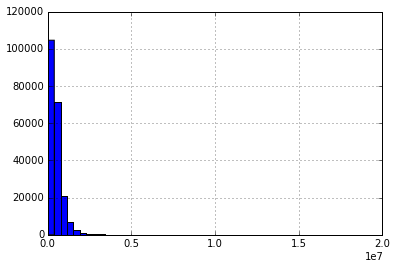

In [29]:
# Let's look at some specific key variables
%matplotlib inline
merged['Sale_price'].hist(bins=50)

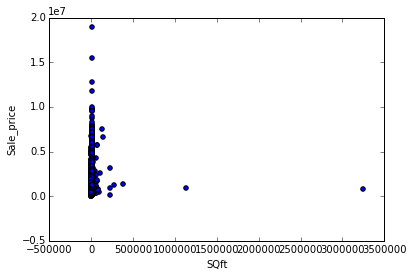

In [31]:
merged.plot(kind='scatter',x='SQft',y='Sale_price')

In [28]:
#Probably need to clean up this data and remove outliers, don't we?
cleaned = merged[(merged['Sale_price']<3000000) & (merged['Sale_price']>100000) 
                & (merged['SQft']>500) & (merged['SQft']<5000)
                & (merged['Year_built'] > 0) & (merged['Year_built'] < 2016)
                & (merged['Year_built'] > 0) & (merged['Year_built'] < 2016)
                & (merged['Lot_size'] > 1000) & (merged['Lot_size'] < 10000)
                ]
cleaned.describe()


,RecordID,X,Y,Lot_size,SQft,Year_built,Sale_price,parcel_id,sales,Sale_price_flt,...,shopping,outdoors,historical,tourism,bars,entertainment,pawn,liquor,bookstores,concerts
count,156655.000000,156655.000000,156655.000000,156655.000000,156655.000000,156655.000000,156655.000000,155030.000000,0,156655.000000,...,156655.000000,156655.000000,156655.000000,156655.000000,156655.000000,156655.000000,156655.000000,156655.000000,156655.000000,156655.000000
mean,132863.483119,-121.468891,37.573289,5404.337321,1646.040560,1967.371185,463719.985465,1078705.750784,NaN,293.621707,...,0.442785,0.639973,0.013915,0.030225,0.821782,1.110571,0.031690,1.314648,0.642950,0.349127
std,79836.907994,8.794186,2.741621,2095.225702,631.213929,26.504727,305123.383497,552088.085378,NaN,178.354766,...,0.551644,0.816886,0.090495,0.156956,2.251126,0.881727,0.155473,2.258242,1.640886,0.988383
min,2.000000,-123.524086,0.000000,1001.000000,501.000000,201.000000,100500.000000,1.000000,NaN,22.876509,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,59628.500000,-122.283714,37.472086,4000.000000,1196.000000,1952.000000,250000.000000,622785.000000,NaN,164.350389,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.460000,0.000000,0.000000,0.000000,0.000000
50%,136260.000000,-122.051384,37.759274,5662.000000,1500.000000,1969.000000,385000.000000,1109482.500000,NaN,256.944444,...,0.260000,0.380000,0.000000,0.000000,0.110000,0.950000,0.000000,0.630000,0.060000,0.000000
75%,206164.500000,-121.886536,37.991854,6804.000000,1936.000000,1988.000000,590000.000000,1534849.750000,NaN,371.123871,...,0.690000,0.960000,0.000000,0.000000,0.810000,1.590000,0.000000,1.600000,0.660000,0.410000
max,261000.000000,0.000000,38.826637,9999.000000,4998.000000,2010.000000,2995000.000000,2079127.000000,NaN,4505.208333,...,4.350000,12.240000,1.990000,4.260000,45.260000,5.780000,3.110000,38.240000,40.830000,25.810000


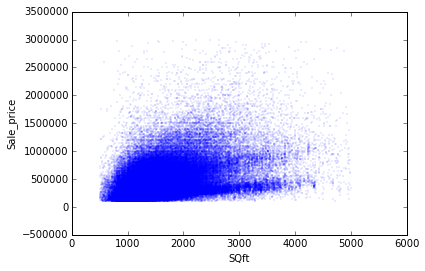

In [34]:
# How much does price correlate with square footage of the house?
cleaned.plot(kind='scatter',x='SQft',y='Sale_price', s=.01, color='blue')

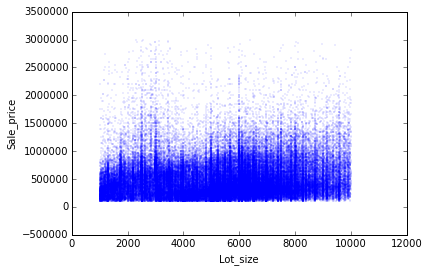

In [36]:
# How much does price vary with Lot size?
cleaned.plot(kind='scatter',x='Lot_size',y='Sale_price', s=.01, color='blue')

In [127]:
# Let's estimate some hedonic regression models, starting simple and adding variables
import statsmodels.formula.api as sm
results = sm.ols('np.log(Sale_price) ~  np.log(SQft)', data=cleaned).fit()
print results.summary()

                            OLS Regression Results                            
Dep. Variable:     np.log(Sale_price)   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                 2.886e+04
Date:                Tue, 27 Oct 2015   Prob (F-statistic):               0.00
Time:                        22:40:37   Log-Likelihood:            -1.2835e+05
No. Observations:              156655   AIC:                         2.567e+05
Df Residuals:                  156653   BIC:                         2.567e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept        7.9641      0.029    275.671   

In [128]:
# Let's estimate some hedonic regression models, starting simple and adding variables
import statsmodels.formula.api as sm
results = sm.ols('np.log(Sale_price) ~  np.log(SQft) + np.log(Lot_size)', data=cleaned).fit()
print results.summary()

                            OLS Regression Results                            
Dep. Variable:     np.log(Sale_price)   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                 1.457e+04
Date:                Tue, 27 Oct 2015   Prob (F-statistic):               0.00
Time:                        22:40:45   Log-Likelihood:            -1.2823e+05
No. Observations:              156655   AIC:                         2.565e+05
Df Residuals:                  156652   BIC:                         2.565e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept            8.2277      0.034  

In [129]:
# Let's estimate some hedonic regression models, starting simple and adding variables
import statsmodels.formula.api as sm
results = sm.ols('np.log(Sale_price) ~  np.log(SQft) + np.log(Lot_size) + year_built<1940',
                 data=cleaned).fit()
print results.summary()

                            OLS Regression Results                            
Dep. Variable:     np.log(Sale_price)   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.172
Method:                 Least Squares   F-statistic:                 1.089e+04
Date:                Tue, 27 Oct 2015   Prob (F-statistic):               0.00
Time:                        22:41:35   Log-Likelihood:            -1.2676e+05
No. Observations:              156655   AIC:                         2.535e+05
Df Residuals:                  156651   BIC:                         2.536e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Intercept             

In [133]:
# Let's estimate some hedonic regression models, starting simple and adding variables
import statsmodels.formula.api as sm
results = sm.ols('np.log(Sale_price) ~  np.log(SQft) + np.log(Lot_size) + year_built<1940 + shopping',
                 data=cleaned).fit()
print results.summary()

                            OLS Regression Results                            
Dep. Variable:     np.log(Sale_price)   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     8637.
Date:                Tue, 27 Oct 2015   Prob (F-statistic):               0.00
Time:                        22:43:26   Log-Likelihood:            -1.2598e+05
No. Observations:              156655   AIC:                         2.520e+05
Df Residuals:                  156650   BIC:                         2.520e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Intercept             

In [134]:
# Let's estimate some hedonic regression models, starting simple and adding variables
import statsmodels.formula.api as sm
results = sm.ols('np.log(Sale_price) ~  np.log(SQft) + np.log(Lot_size) + year_built<1940 + shopping + groceries',
                 data=cleaned).fit()
print results.summary()

                            OLS Regression Results                            
Dep. Variable:     np.log(Sale_price)   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     7032.
Date:                Tue, 27 Oct 2015   Prob (F-statistic):               0.00
Time:                        22:44:12   Log-Likelihood:            -1.2573e+05
No. Observations:              156655   AIC:                         2.515e+05
Df Residuals:                  156649   BIC:                         2.515e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Intercept             

In [137]:

import statsmodels.formula.api as sm
results = sm.ols('np.log(Sale_price) ~  np.log(SQft) + np.log(Lot_size)+ year_built<1940 + shopping+ groceries + tattoo', data=cleaned).fit()
print results.summary()

                            OLS Regression Results                            
Dep. Variable:     np.log(Sale_price)   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     5904.
Date:                Tue, 27 Oct 2015   Prob (F-statistic):               0.00
Time:                        22:45:13   Log-Likelihood:            -1.2562e+05
No. Observations:              156655   AIC:                         2.513e+05
Df Residuals:                  156648   BIC:                         2.513e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Intercept             